# 20/50-day SMA Crossover Backtest

This notebook demonstrates a simple moving average (SMA) crossover backtest on SPY using 20/50-day windows.

In [1]:
import sys
import os
from datetime import datetime
sys.path.append(os.path.abspath('..'))

## Parameters

In [2]:
TICKER = 'SPY'
START_DATE = '2015-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
FAST_SMA = 20
SLOW_SMA = 50
INITIAL_CASH = 100000
TRANSACTION_COST = 0.001
SMA_PAIRS = [(10, 20), (20, 50), (50, 100)] # Example SMA pairs to test

In [3]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

In [4]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

In [5]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

In [6]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

In [7]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

In [8]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime

## Fetch Data

In [9]:
df = fetch_data(TICKER, START_DATE, END_DATE)
df.head()

Fetched data for SPY from Stooq.


,Close
Date,
2015-01-02,172.069
2015-01-05,168.957
2015-01-06,167.378
2015-01-07,169.435
2015-01-08,172.469


## Compute SMAs and Generate Signals

In [10]:
df['SMA_fast'] = compute_sma(df, FAST_SMA)
df['SMA_slow'] = compute_sma(df, SLOW_SMA)
df = generate_signals(df)
df[['Close', 'SMA_fast', 'SMA_slow', 'signal']].tail()

,Close,SMA_fast,SMA_slow,signal
Date,,,,
2025-07-11,623.62,611.4660,594.7230,0.0
2025-07-14,624.81,612.5190,596.1284,0.0
2025-07-15,622.14,613.7760,597.4018,0.0
2025-07-16,624.22,614.8530,598.5510,0.0
2025-07-17,628.04,616.3785,599.8416,0.0


## Plot Price and Signals

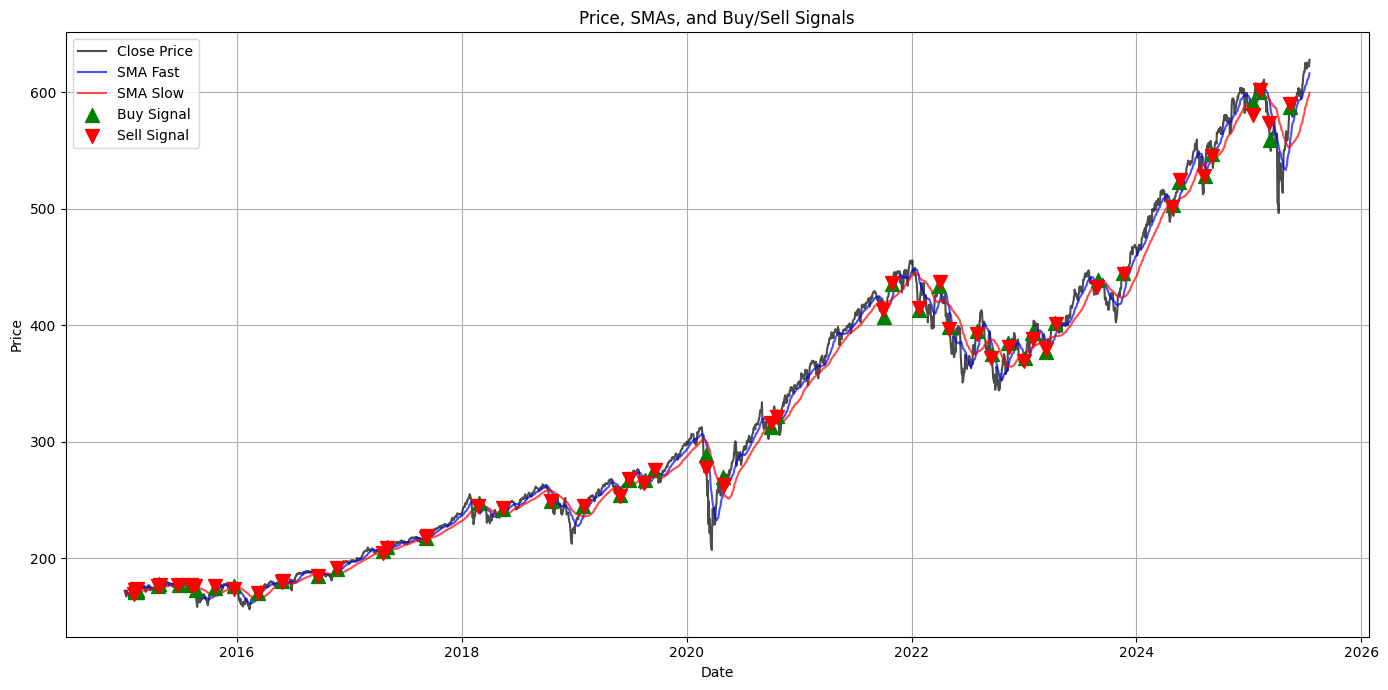

In [11]:
plot_price_signals(df)

## Run Backtest

In [12]:
results = backtest_signals(df, initial_cash=INITIAL_CASH, transaction_cost=TRANSACTION_COST)
results.tail()

,cash,position,portfolio_value
Date,,,
2025-07-11,100002.163994,0.0,100002.163994
2025-07-14,100002.163994,0.0,100002.163994
2025-07-15,100002.163994,0.0,100002.163994
2025-07-16,100002.163994,0.0,100002.163994
2025-07-17,100002.163994,0.0,100002.163994


## Performance Metrics


Performance Summary:
-------------------
Cumulative Return: 0.00%
Sharpe Ratio:      0.02
Max Drawdown:      -0.03%


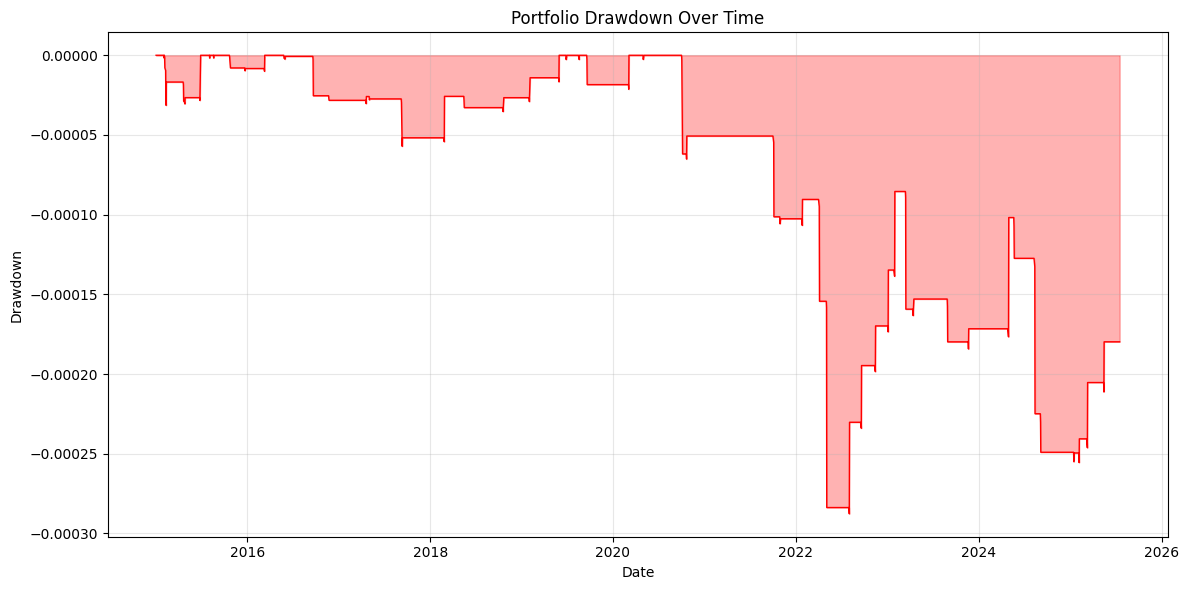

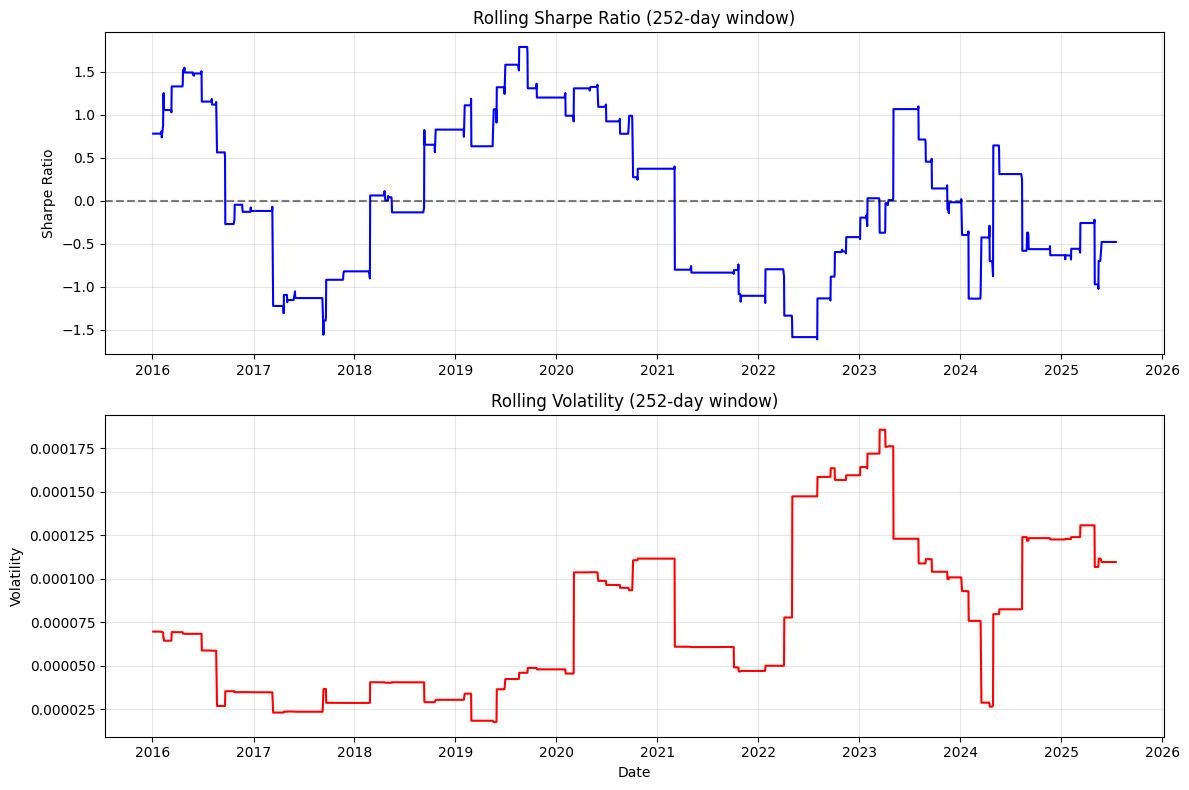

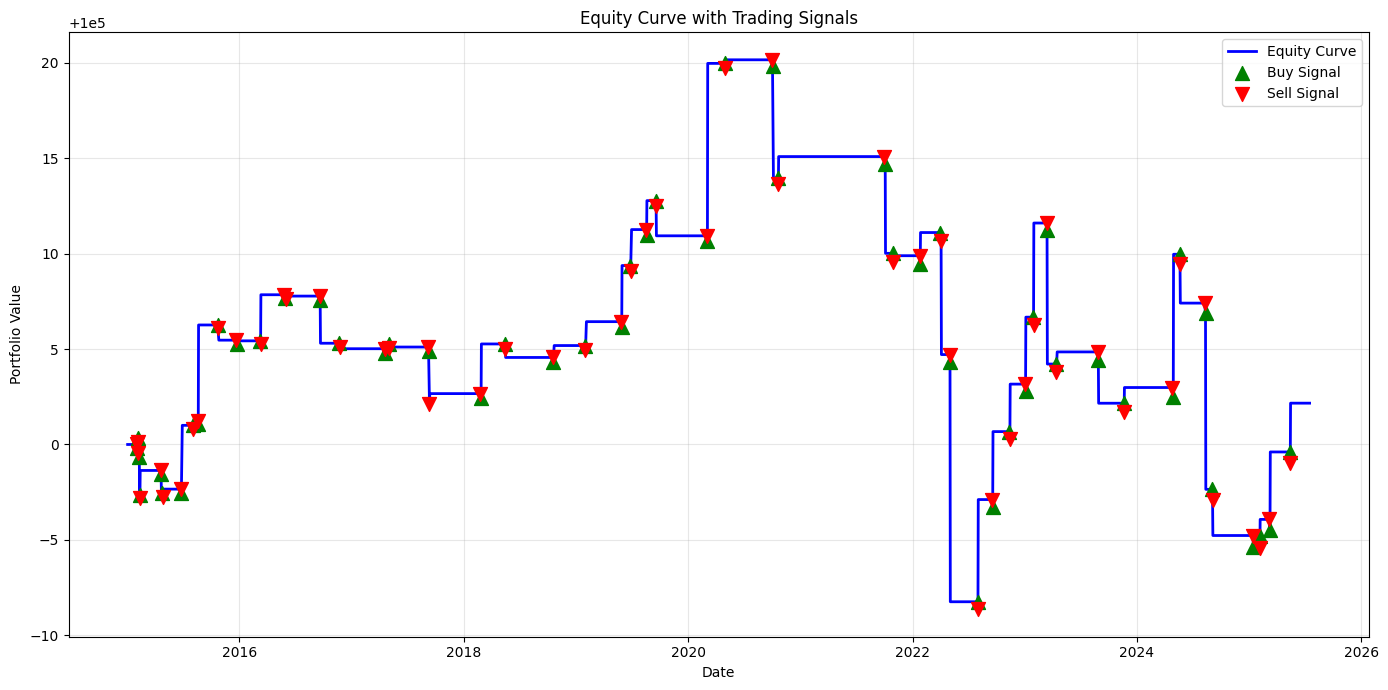

Rolling metrics summary:
       Rolling_Sharpe  Rolling_Volatility  Rolling_Drawdown
count     2398.000000         2398.000000       2650.000000
mean         0.003478            0.000076         -0.000078
std          0.884871            0.000044          0.000082
min         -1.609312            0.000018         -0.000288
25%         -0.800327            0.000037         -0.000153
50%         -0.118452            0.000061         -0.000033
75%          0.826122            0.000111         -0.000017
max          1.785829            0.000186          0.000000


In [13]:
print_metrics_table(results['portfolio_value'])
## Enhanced Visualizations

# Drawdown analysis
plot_drawdown(results['portfolio_value'])

# Rolling metrics over time
plot_rolling_metrics(results['portfolio_value'])

# Equity curve with trading signals
plot_equity_with_signals(results['portfolio_value'], df)

# Get rolling metrics for analysis
rolling_metrics = compute_rolling_metrics(results['portfolio_value'])
print("Rolling metrics summary:")
print(rolling_metrics.describe())

## Plot Equity Curve

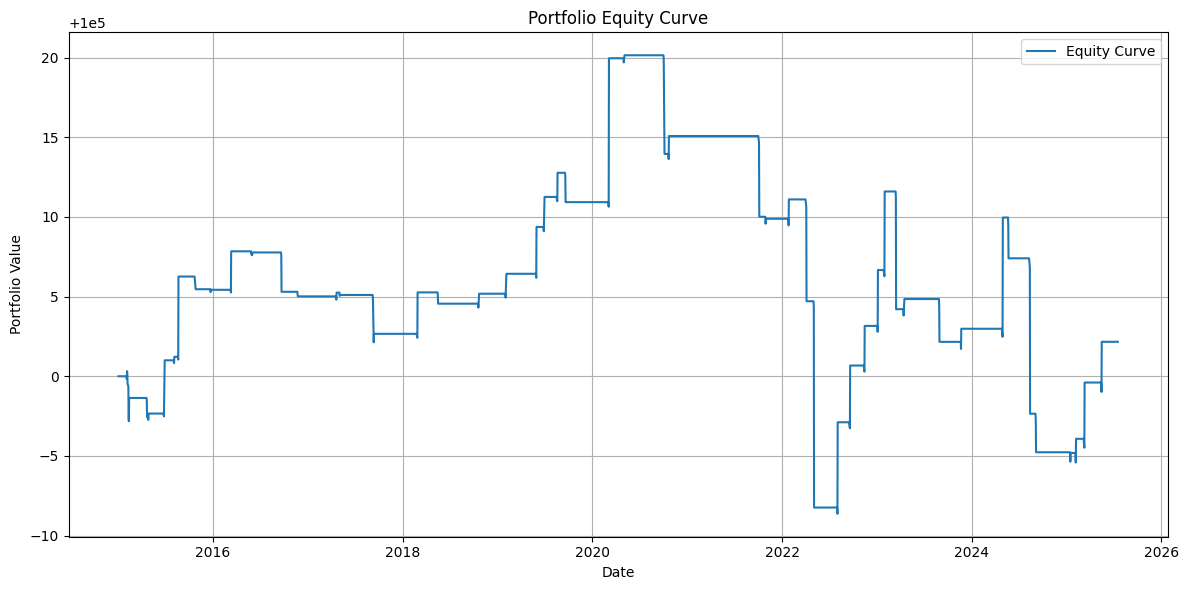

In [14]:
plot_equity_curve(results['portfolio_value'])

## Parameter Grid Search Results

In [15]:
metrics_list = []
for fast_sma, slow_sma in SMA_PAIRS:
    print(f"""
Running backtest for SMA_fast={fast_sma}, SMA_slow={slow_sma}
""")
    temp_df = df.copy()
    temp_df['SMA_fast'] = compute_sma(temp_df, fast_sma)
    temp_df['SMA_slow'] = compute_sma(temp_df, slow_sma)
    temp_df = generate_signals(temp_df)
    temp_results = backtest_signals(temp_df, initial_cash=INITIAL_CASH, transaction_cost=TRANSACTION_COST)
    
    cumulative_return = compute_cumulative_return(temp_results['portfolio_value'])
    sharpe = compute_sharpe_ratio(temp_results['portfolio_value'])
    max_dd = compute_max_drawdown(temp_results['portfolio_value'])
    
    metrics_list.append({
        'Fast SMA': fast_sma,
        'Slow SMA': slow_sma,
        'Cumulative Return': cumulative_return,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_dd
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df_sorted = metrics_df.sort_values(by='Sharpe Ratio', ascending=False)


Running backtest for SMA_fast=10, SMA_slow=20


Running backtest for SMA_fast=20, SMA_slow=50


Running backtest for SMA_fast=50, SMA_slow=100



In [16]:
print('--- Grid Search Results (Sorted by Sharpe Ratio) ---')
print(metrics_df_sorted.to_string(formatters={'Cumulative Return': '{:.2%}'.format, 'Sharpe Ratio': '{:.2f}'.format, 'Max Drawdown': '{:.2%}'.format}))

--- Grid Search Results (Sorted by Sharpe Ratio) ---
   Fast SMA  Slow SMA Cumulative Return Sharpe Ratio Max Drawdown
1        20        50             0.00%         0.02       -0.03%
2        50       100            -0.03%        -0.33       -0.04%
0        10        20            -0.11%        -0.98       -0.13%


### Commentary
- The 20/50-day SMA crossover strategy is a classic trend-following approach.
- Review the cumulative return, Sharpe ratio, and max drawdown above.
- The equity curve plot visualizes the growth of the portfolio over time.
- Consider experimenting with different parameters or assets for further analysis.

In [ ]:
from src.data_loader import fetch_data
from src.indicators import compute_sma
from src.signals import generate_signals
from src.backtester import backtest_signals
from src.metrics import (compute_cumulative_return, compute_sharpe_ratio, 
                        compute_max_drawdown, plot_equity_curve, plot_price_signals, 
                        print_metrics_table, plot_drawdown, plot_rolling_metrics, 
                        plot_equity_with_signals, compute_rolling_metrics)
import pandas as pd
from datetime import datetime